#### Task :

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter.
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes.
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Never Used" and "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).

 Comment your results, and point which selection of classes have better accuracy.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data',
                     names= ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore",
                            "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc",
                            "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine",
                            "Semer", "VSA"])
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
# Dropping the ID column
data = data.drop('ID', axis=1)
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
data.dtypes

Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [5]:
data.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [6]:
# Checking the Overclaimers for Semer fake drug
data['Semer'].value_counts()

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semer, dtype: int64

In [7]:
# Dropping the column as there are not many Oveclaimers only 8 so there is no much values in the column except CL0
data = data.drop('Semer', axis=1)

In [8]:
#Assigning numeric value to classes from 0-6
def num_to_drug_class(x):
    if x == 'CL0':
        # CL0 Never Used
        return 0
    elif x == 'CL1':
        # CL1 Used over a Decade Ago
        return 1
    elif x == 'CL2':
        # CL2 Used in Last Decade
        return 2
    elif x == 'CL3':
        #CL3 Used in Last Year
        return 3
    elif x == 'CL4':
        #CL4 Used in Last Month
        return 4
    elif x == 'CL5':
        #CL5 Used in Last Week
        return 5
    elif x == 'CL6':
        # CL6 Used in Last Day
        return 6

In [9]:
drugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc",
         "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine",
         "VSA"]
data
#Making a copy of data
df = data.copy()

In [10]:
#Assign numbers/encoding to drugs classes
for column in drugs:
    df[column] = data[column].apply(num_to_drug_class)

df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,0,3,3,0,0,0,5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,0,2,0,0,3,5,4,4,5,0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,0,4,0,2,0,2,0,2,6,0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,0,3,0,0,3,3,0,3,4,0


In [11]:
# As given the Database contains 18 classification problems
# So the 18 drugs related varible will be treated as y or value to be predicted and
# For each respondent 12 attributes are known X and remaining 18 are Y in this assignment at different points
X = df.iloc[:,:12].values

In [12]:
#These will be the independent variables
X

array([[ 0.49788,  0.48246, -0.05921, ..., -0.00665, -0.21712, -1.18084],
       [-0.07854, -0.48246,  1.98437, ..., -0.14277, -0.71126, -0.21575],
       [ 0.49788, -0.48246, -0.05921, ..., -1.0145 , -1.37983,  0.40148],
       ...,
       [-0.07854,  0.48246,  0.45468, ..., -1.38502,  0.52975, -0.52593],
       [-0.95197,  0.48246, -0.61113, ..., -2.57309,  1.29221,  1.2247 ],
       [-0.95197, -0.48246, -0.61113, ...,  0.41594,  0.88113,  1.2247 ]])

In [13]:
#For splitting train test based on the selected drug
def split_train_test(df, X, durg_name):
    # Split df into X and y
    y = df[durg_name]
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

### Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.

In [14]:
# Multiclass classification for Feature/drug Alcohol
drug1='Alcohol'
X_train, X_test, y_train, y_test = split_train_test(df, X , drug1)

In [15]:
y_train

1814    4
710     4
931     5
617     5
1797    2
       ..
1130    6
1294    4
860     6
1459    5
1126    5
Name: Alcohol, Length: 1508, dtype: int64

In [16]:
models = {'Random Forest Classifier': RandomForestClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier() }

In [17]:
# RandomForestClassifier and GradientBoostingClassifier for Alcohol classes with default parameters
for model_name,model_func in models.items():
    model=model_func
    model.fit(X_train, y_train)
    print(f'Accuracy of {model_name} with default parmeters for {drug1} on Train set is : {round(model.score(X_train, y_train),4)}')
    print(f'Accuracy of {model_name} with default parmeters for {drug1} on  Test set is : {round(model.score(X_test, y_test),4)}')
    print('')

Accuracy of Random Forest Classifier with default parmeters for Alcohol on Train set is : 1.0
Accuracy of Random Forest Classifier with default parmeters for Alcohol on  Test set is : 0.366

Accuracy of Gradient Boosting Classifier with default parmeters for Alcohol on Train set is : 0.7056
Accuracy of Gradient Boosting Classifier with default parmeters for Alcohol on  Test set is : 0.3554



In [18]:
# Multiclass classification for Feature/drug Amphet
drug2='Amphet'
X_train, X_test, y_train, y_test = split_train_test(df, X , drug2)

In [19]:
y_train

1814    2
710     3
931     0
617     0
1797    1
       ..
1130    2
1294    3
860     2
1459    0
1126    5
Name: Amphet, Length: 1508, dtype: int64

In [20]:
# RandomForestClassifier and GradientBoostingClassifier for Amphet classes with default parameters
for model_name,model_func in models.items():
    model=model_func
    model.fit(X_train, y_train)
    print(f'Accuracy of {model_name} with default parmeters for {drug2} on Train set is : {round(model.score(X_train, y_train),4)}')
    print(f'Accuracy of {model_name} with default parmeters for {drug2} on  Test set is : {round(model.score(X_test, y_test),4)}')
    print('')

Accuracy of Random Forest Classifier with default parmeters for Amphet on Train set is : 1.0
Accuracy of Random Forest Classifier with default parmeters for Amphet on  Test set is : 0.4907

Accuracy of Gradient Boosting Classifier with default parmeters for Amphet on Train set is : 0.7865
Accuracy of Gradient Boosting Classifier with default parmeters for Amphet on  Test set is : 0.4987



### Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter.

In [21]:
# Using GradientBoostingClassifier the above model for predicitng Amphet classes by
# random_state=0 and
# 5 different values of learning_rate
# Above model with default values has Default learning rate value is 0.1
model_training_accuracy = []
model_testing_accuracy = []

In [22]:
#Learning rate 5 different values
learning_rates = [0.01, 0.5, 1, 5, 10]
# As train and test sest have been splitted for Amphet already in previous model so no need to split again

In [23]:
#GradientBoostingClassifier for Amphet drug with 5 different learning_rate parameter value
for learning_rate in learning_rates:
    gbrt=GradientBoostingClassifier(random_state=0, learning_rate=learning_rate)
    gbrt.fit(X_train, y_train)
    print(f'Accuracy of GradientBoostingClassifier with learning_rate = {learning_rate} for {drug2} on Train set is : {round(gbrt.score(X_train, y_train),4)}')
    print(f'Accuracy of GradientBoostingClassifier with learning_rate = {learning_rate} for {drug2} on  Test set is : {round(gbrt.score(X_test, y_test),4)}')
    print('')
    #adding model train and test accuracy for plotting below
    model_training_accuracy.append(round(gbrt.score(X_train, y_train),4))
    model_testing_accuracy.append(round(gbrt.score(X_test, y_test),4))

Accuracy of GradientBoostingClassifier with learning_rate = 0.01 for Amphet on Train set is : 0.5332
Accuracy of GradientBoostingClassifier with learning_rate = 0.01 for Amphet on  Test set is : 0.5279

Accuracy of GradientBoostingClassifier with learning_rate = 0.5 for Amphet on Train set is : 0.9973
Accuracy of GradientBoostingClassifier with learning_rate = 0.5 for Amphet on  Test set is : 0.443

Accuracy of GradientBoostingClassifier with learning_rate = 1 for Amphet on Train set is : 0.9987
Accuracy of GradientBoostingClassifier with learning_rate = 1 for Amphet on  Test set is : 0.4271

Accuracy of GradientBoostingClassifier with learning_rate = 5 for Amphet on Train set is : 0.2447
Accuracy of GradientBoostingClassifier with learning_rate = 5 for Amphet on  Test set is : 0.2387

Accuracy of GradientBoostingClassifier with learning_rate = 10 for Amphet on Train set is : 0.0723
Accuracy of GradientBoostingClassifier with learning_rate = 10 for Amphet on  Test set is : 0.0504



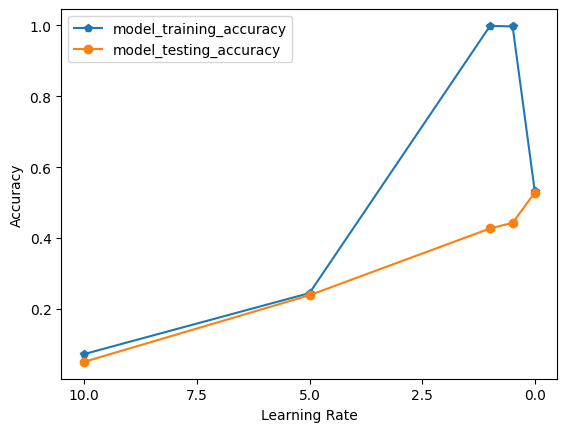

In [24]:
#Plotting the train and test scores with learning_rate values set to 0.01, 0.5, 1, 5, 10 for Amphet drug
plt.plot(learning_rates, model_training_accuracy, label="model_training_accuracy", marker='p')
plt.plot(learning_rates, model_testing_accuracy, label="model_testing_accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.locator_params(axis='x', nbins=len(learning_rates))

plt.gca().invert_xaxis()
plt.legend()
plt.show()

#### The test accuracy score of 0.5279 is highest with Learning Rate  0.01 for Amphet among the build models

### Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes.

In [25]:
#Function to easily plot confusion matrix
def plot_confusion_matrix(cm, displayLabels):
    #Ploting confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels= displayLabels)
    disp.plot()
    plt.show()

In [26]:
drugs

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'VSA']

In [27]:
# Removing Alcohol and Amphet from drug list pwe only need rest 16 features
drugs_rem = [drug_name for drug_name in drugs if drug_name not in ('Alcohol', 'Amphet')]
drugs_rem

['Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'VSA']

In [28]:
#GradientBoostingClassifier for reamining 16 drugs with default parameter
model_training_accuracy = []
model_testing_accuracy = []
confusion_matrices = []
labels=[0,1,2,3,4,5,6]
for drug in drugs_rem:
    # Get train and test set for the drug
    X_train, X_test, y_train, y_test = split_train_test(df, X , drug)
    #Fit the model
    gbrt=GradientBoostingClassifier()
    gbrt.fit(X_train, y_train)
    print(f'Accuracy of GradientBoostingClassifier with default parmeters for {drug} on Train set is : {round(gbrt.score(X_train, y_train),4)}')
    print(f'Accuracy of GradientBoostingClassifier with default parmeters for {drug} on Test set is : {round(gbrt.score(X_test, y_test),4)}')
    print('')
    #adding model train and test accuracy for plotting
    model_training_accuracy.append(round(gbrt.score(X_train, y_train),4))
    model_testing_accuracy.append(round(gbrt.score(X_test, y_test),4))
    #getting confusion matrix
    y_pred = gbrt.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    confusion_matrices.append(cm)

Accuracy of GradientBoostingClassifier with default parmeters for Amyl on Train set is : 0.8541
Accuracy of GradientBoostingClassifier with default parmeters for Amyl on Test set is : 0.6844

Accuracy of GradientBoostingClassifier with default parmeters for Benzos on Train set is : 0.7613
Accuracy of GradientBoostingClassifier with default parmeters for Benzos on Test set is : 0.5252

Accuracy of GradientBoostingClassifier with default parmeters for Caff on Train set is : 0.8276
Accuracy of GradientBoostingClassifier with default parmeters for Caff on Test set is : 0.7003

Accuracy of GradientBoostingClassifier with default parmeters for Cannabis on Train set is : 0.7414
Accuracy of GradientBoostingClassifier with default parmeters for Cannabis on Test set is : 0.3554

Accuracy of GradientBoostingClassifier with default parmeters for Choc on Train set is : 0.7122
Accuracy of GradientBoostingClassifier with default parmeters for Choc on Test set is : 0.3607

Accuracy of GradientBoosting

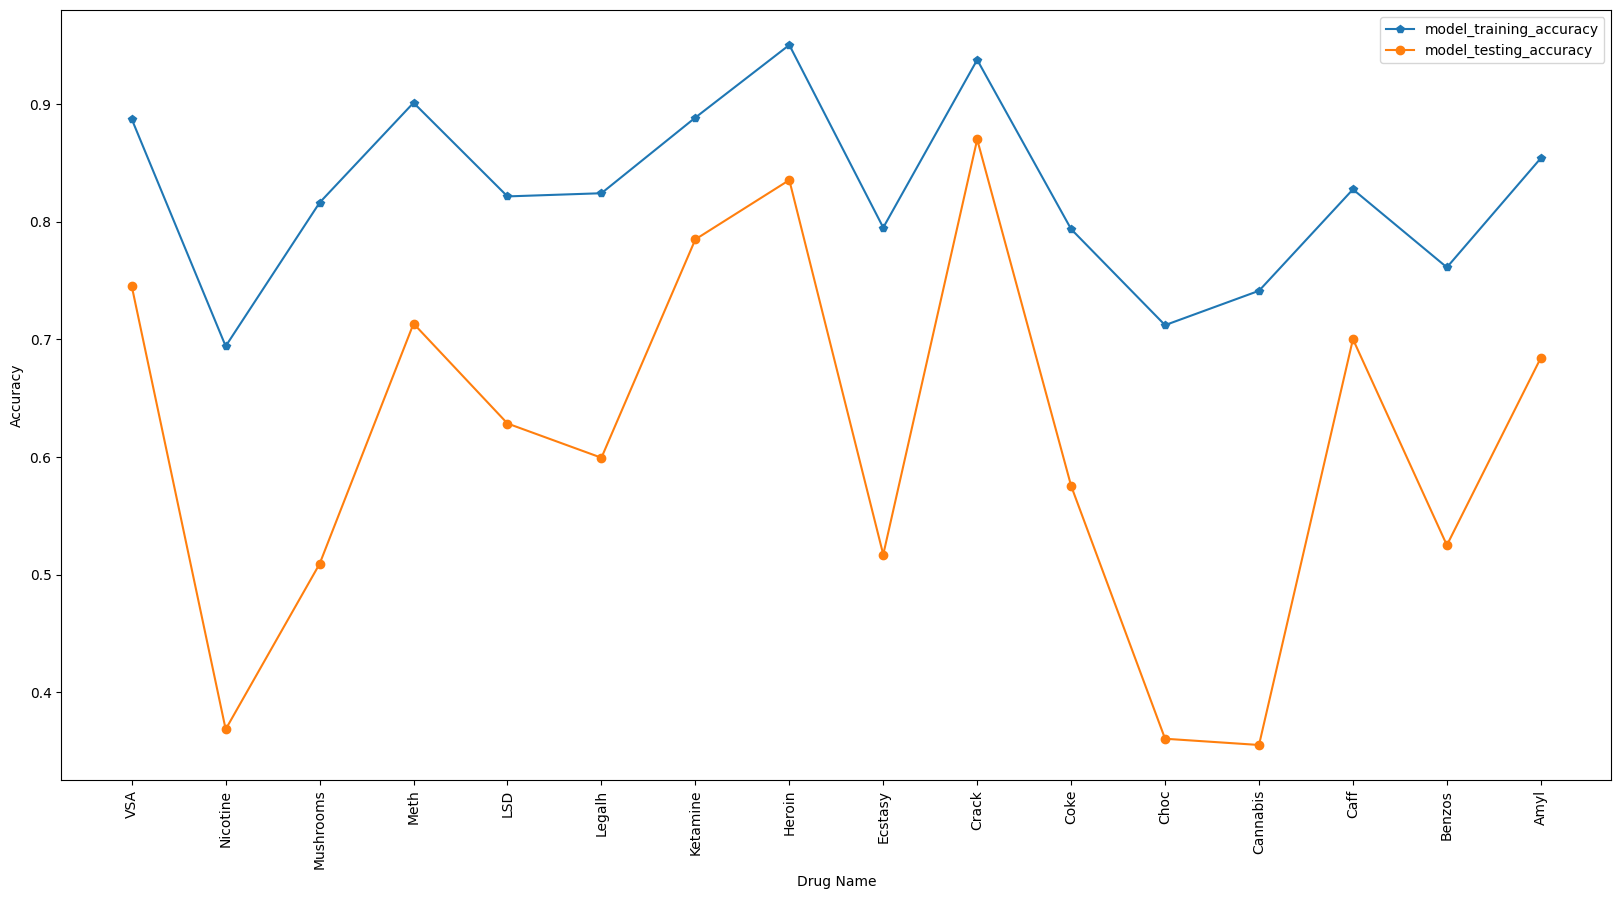

In [29]:
#Plotting the train and test scores for all the drugs
plt.figure(figsize=(20,10))
plt.plot(drugs_rem, model_training_accuracy, label="model_training_accuracy", marker='p')
plt.plot(drugs_rem, model_testing_accuracy, label="model_testing_accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Drug Name")
plt.xticks(range(len(drugs_rem)), drugs_rem, rotation=90)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [30]:
# Function to print accuracy per class for a given drug(feature) from confusion matrix
def print_accuracy_per_class(drug_name, confusion_matrix, drug_class):
    #Normalize the diagonal entries for the confusion_matrix
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    class_accuracy = confusion_matrix.diagonal()
    # If nan values in class_accuracy then set it to 0
    class_accuracy = np.nan_to_num(class_accuracy)
    for class_name, class_acc in zip(drug_class, class_accuracy):
        print(f'Model accurracy of predicting feature drug {drug_name} for class {class_name} is {round(class_acc * 100,2)}%')

### Below are comments as print statement on the accuracy of predicting each feature, for all the seven classes

### Plotting confusion metrics for each of the 16 drugs(feature)
### And commenting below the plotted confusion matrix using print statements on the accuracy of predicting each feature, for all the seven classes

 Confusion Matrix for durg Amyl


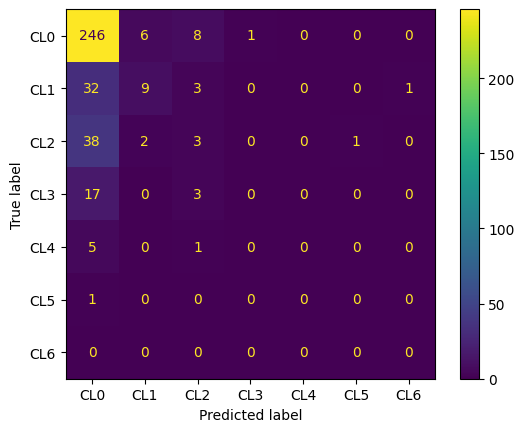

<ipython-input-30-561b92bb196f>:4: RuntimeWarning: invalid value encountered in true_divide
  confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]


Model accurracy of predicting feature drug Amyl for class CL0 is 94.25%
Model accurracy of predicting feature drug Amyl for class CL1 is 20.0%
Model accurracy of predicting feature drug Amyl for class CL2 is 6.82%
Model accurracy of predicting feature drug Amyl for class CL3 is 0.0%
Model accurracy of predicting feature drug Amyl for class CL4 is 0.0%
Model accurracy of predicting feature drug Amyl for class CL5 is 0.0%
Model accurracy of predicting feature drug Amyl for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Benzos


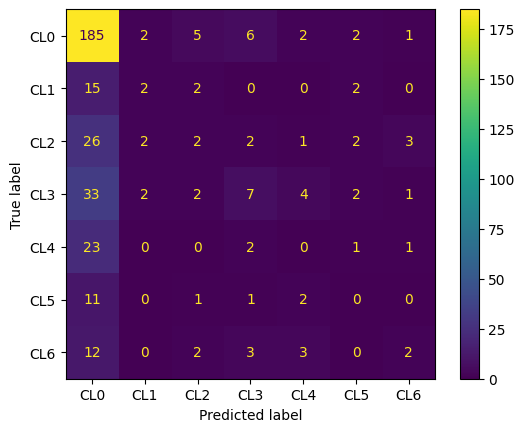

Model accurracy of predicting feature drug Benzos for class CL0 is 91.13%
Model accurracy of predicting feature drug Benzos for class CL1 is 9.52%
Model accurracy of predicting feature drug Benzos for class CL2 is 5.26%
Model accurracy of predicting feature drug Benzos for class CL3 is 13.73%
Model accurracy of predicting feature drug Benzos for class CL4 is 0.0%
Model accurracy of predicting feature drug Benzos for class CL5 is 0.0%
Model accurracy of predicting feature drug Benzos for class CL6 is 9.09%
-----------------------


 Confusion Matrix for durg Caff


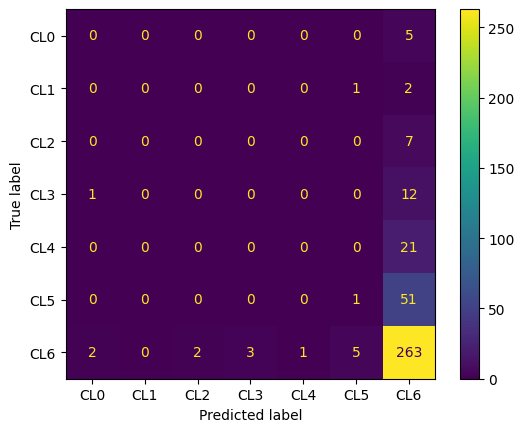

Model accurracy of predicting feature drug Caff for class CL0 is 0.0%
Model accurracy of predicting feature drug Caff for class CL1 is 0.0%
Model accurracy of predicting feature drug Caff for class CL2 is 0.0%
Model accurracy of predicting feature drug Caff for class CL3 is 0.0%
Model accurracy of predicting feature drug Caff for class CL4 is 0.0%
Model accurracy of predicting feature drug Caff for class CL5 is 1.92%
Model accurracy of predicting feature drug Caff for class CL6 is 95.29%
-----------------------


 Confusion Matrix for durg Cannabis


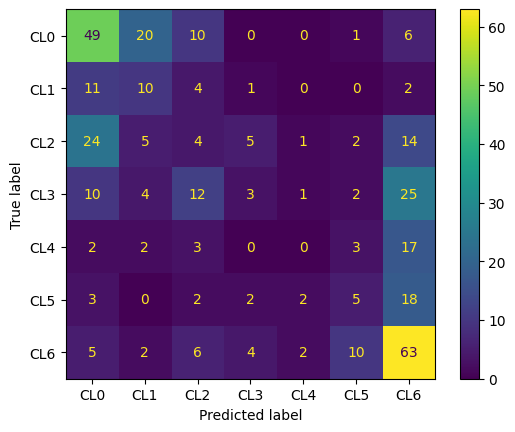

Model accurracy of predicting feature drug Cannabis for class CL0 is 56.98%
Model accurracy of predicting feature drug Cannabis for class CL1 is 35.71%
Model accurracy of predicting feature drug Cannabis for class CL2 is 7.27%
Model accurracy of predicting feature drug Cannabis for class CL3 is 5.26%
Model accurracy of predicting feature drug Cannabis for class CL4 is 0.0%
Model accurracy of predicting feature drug Cannabis for class CL5 is 15.62%
Model accurracy of predicting feature drug Cannabis for class CL6 is 68.48%
-----------------------


 Confusion Matrix for durg Choc


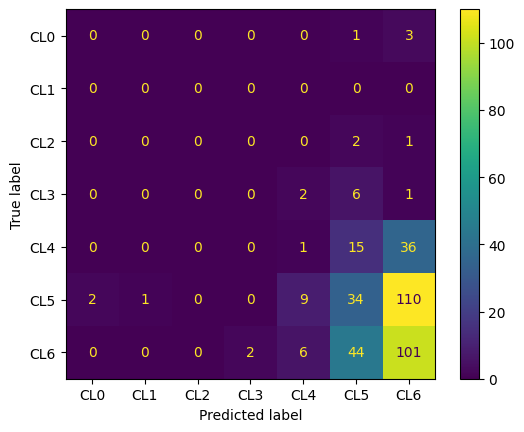

Model accurracy of predicting feature drug Choc for class CL0 is 0.0%
Model accurracy of predicting feature drug Choc for class CL1 is 0.0%
Model accurracy of predicting feature drug Choc for class CL2 is 0.0%
Model accurracy of predicting feature drug Choc for class CL3 is 0.0%
Model accurracy of predicting feature drug Choc for class CL4 is 1.92%
Model accurracy of predicting feature drug Choc for class CL5 is 21.79%
Model accurracy of predicting feature drug Choc for class CL6 is 66.01%
-----------------------


 Confusion Matrix for durg Coke


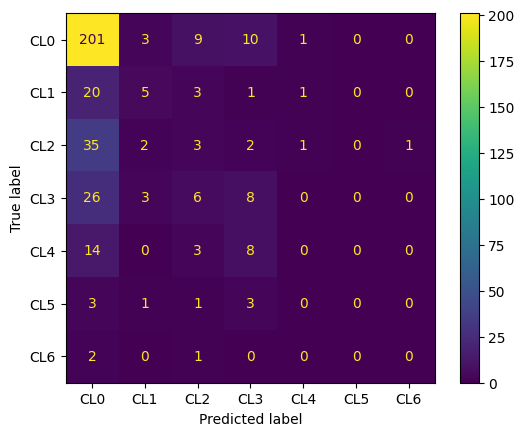

Model accurracy of predicting feature drug Coke for class CL0 is 89.73%
Model accurracy of predicting feature drug Coke for class CL1 is 16.67%
Model accurracy of predicting feature drug Coke for class CL2 is 6.82%
Model accurracy of predicting feature drug Coke for class CL3 is 18.6%
Model accurracy of predicting feature drug Coke for class CL4 is 0.0%
Model accurracy of predicting feature drug Coke for class CL5 is 0.0%
Model accurracy of predicting feature drug Coke for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Crack


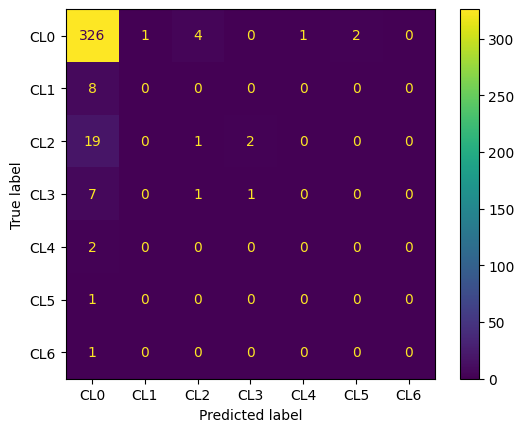

Model accurracy of predicting feature drug Crack for class CL0 is 97.6%
Model accurracy of predicting feature drug Crack for class CL1 is 0.0%
Model accurracy of predicting feature drug Crack for class CL2 is 4.55%
Model accurracy of predicting feature drug Crack for class CL3 is 11.11%
Model accurracy of predicting feature drug Crack for class CL4 is 0.0%
Model accurracy of predicting feature drug Crack for class CL5 is 0.0%
Model accurracy of predicting feature drug Crack for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Ecstasy


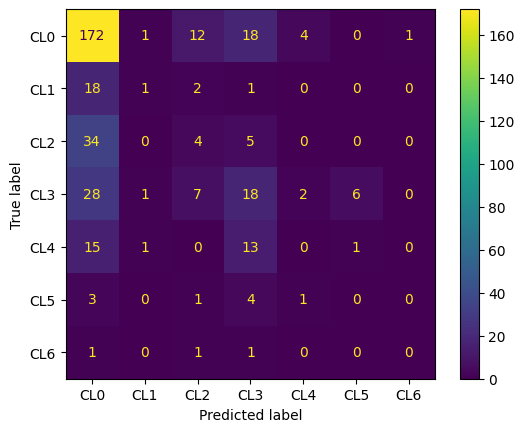

Model accurracy of predicting feature drug Ecstasy for class CL0 is 82.69%
Model accurracy of predicting feature drug Ecstasy for class CL1 is 4.55%
Model accurracy of predicting feature drug Ecstasy for class CL2 is 9.3%
Model accurracy of predicting feature drug Ecstasy for class CL3 is 29.03%
Model accurracy of predicting feature drug Ecstasy for class CL4 is 0.0%
Model accurracy of predicting feature drug Ecstasy for class CL5 is 0.0%
Model accurracy of predicting feature drug Ecstasy for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Heroin


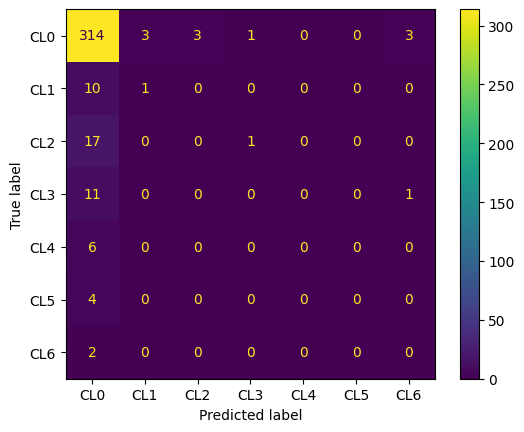

Model accurracy of predicting feature drug Heroin for class CL0 is 96.91%
Model accurracy of predicting feature drug Heroin for class CL1 is 9.09%
Model accurracy of predicting feature drug Heroin for class CL2 is 0.0%
Model accurracy of predicting feature drug Heroin for class CL3 is 0.0%
Model accurracy of predicting feature drug Heroin for class CL4 is 0.0%
Model accurracy of predicting feature drug Heroin for class CL5 is 0.0%
Model accurracy of predicting feature drug Heroin for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Ketamine


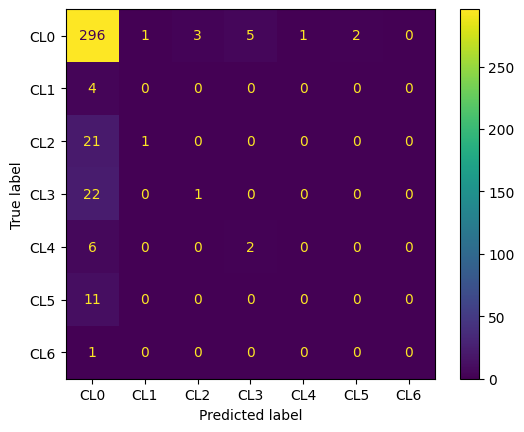

Model accurracy of predicting feature drug Ketamine for class CL0 is 96.1%
Model accurracy of predicting feature drug Ketamine for class CL1 is 0.0%
Model accurracy of predicting feature drug Ketamine for class CL2 is 0.0%
Model accurracy of predicting feature drug Ketamine for class CL3 is 0.0%
Model accurracy of predicting feature drug Ketamine for class CL4 is 0.0%
Model accurracy of predicting feature drug Ketamine for class CL5 is 0.0%
Model accurracy of predicting feature drug Ketamine for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Legalh


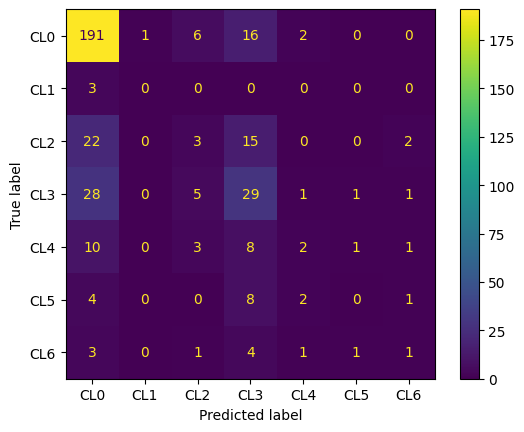

Model accurracy of predicting feature drug Legalh for class CL0 is 88.43%
Model accurracy of predicting feature drug Legalh for class CL1 is 0.0%
Model accurracy of predicting feature drug Legalh for class CL2 is 7.14%
Model accurracy of predicting feature drug Legalh for class CL3 is 44.62%
Model accurracy of predicting feature drug Legalh for class CL4 is 8.0%
Model accurracy of predicting feature drug Legalh for class CL5 is 0.0%
Model accurracy of predicting feature drug Legalh for class CL6 is 9.09%
-----------------------


 Confusion Matrix for durg LSD


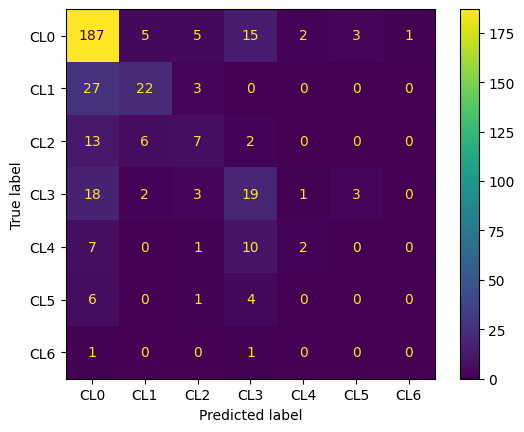

Model accurracy of predicting feature drug LSD for class CL0 is 85.78%
Model accurracy of predicting feature drug LSD for class CL1 is 42.31%
Model accurracy of predicting feature drug LSD for class CL2 is 25.0%
Model accurracy of predicting feature drug LSD for class CL3 is 41.3%
Model accurracy of predicting feature drug LSD for class CL4 is 10.0%
Model accurracy of predicting feature drug LSD for class CL5 is 0.0%
Model accurracy of predicting feature drug LSD for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Meth


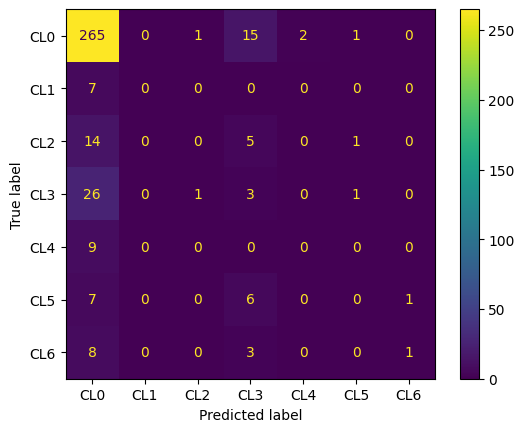

Model accurracy of predicting feature drug Meth for class CL0 is 93.31%
Model accurracy of predicting feature drug Meth for class CL1 is 0.0%
Model accurracy of predicting feature drug Meth for class CL2 is 0.0%
Model accurracy of predicting feature drug Meth for class CL3 is 9.68%
Model accurracy of predicting feature drug Meth for class CL4 is 0.0%
Model accurracy of predicting feature drug Meth for class CL5 is 0.0%
Model accurracy of predicting feature drug Meth for class CL6 is 8.33%
-----------------------


 Confusion Matrix for durg Mushrooms


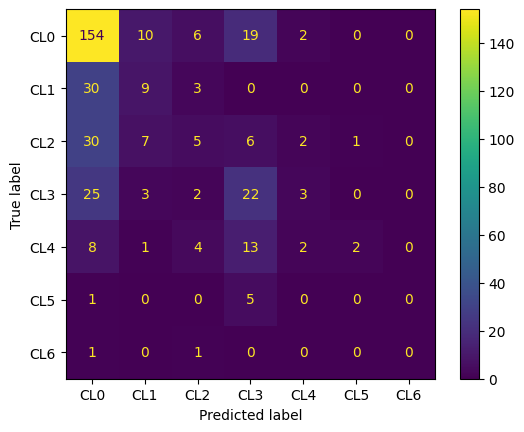

Model accurracy of predicting feature drug Mushrooms for class CL0 is 80.63%
Model accurracy of predicting feature drug Mushrooms for class CL1 is 21.43%
Model accurracy of predicting feature drug Mushrooms for class CL2 is 9.8%
Model accurracy of predicting feature drug Mushrooms for class CL3 is 40.0%
Model accurracy of predicting feature drug Mushrooms for class CL4 is 6.67%
Model accurracy of predicting feature drug Mushrooms for class CL5 is 0.0%
Model accurracy of predicting feature drug Mushrooms for class CL6 is 0.0%
-----------------------


 Confusion Matrix for durg Nicotine


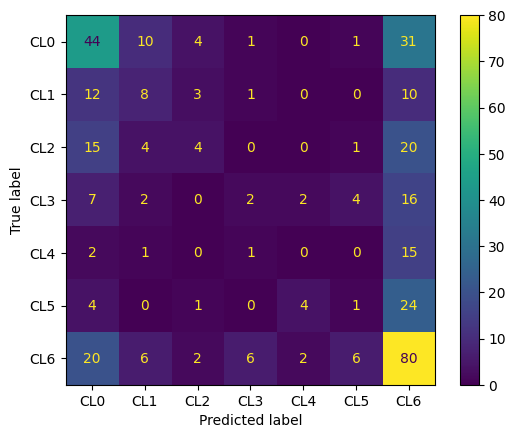

Model accurracy of predicting feature drug Nicotine for class CL0 is 48.35%
Model accurracy of predicting feature drug Nicotine for class CL1 is 23.53%
Model accurracy of predicting feature drug Nicotine for class CL2 is 9.09%
Model accurracy of predicting feature drug Nicotine for class CL3 is 6.06%
Model accurracy of predicting feature drug Nicotine for class CL4 is 0.0%
Model accurracy of predicting feature drug Nicotine for class CL5 is 2.94%
Model accurracy of predicting feature drug Nicotine for class CL6 is 65.57%
-----------------------


 Confusion Matrix for durg VSA


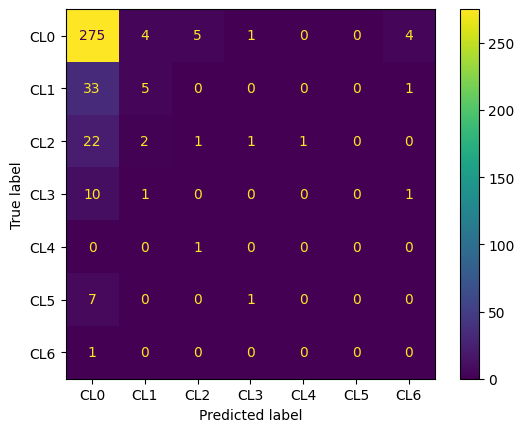

Model accurracy of predicting feature drug VSA for class CL0 is 95.16%
Model accurracy of predicting feature drug VSA for class CL1 is 12.82%
Model accurracy of predicting feature drug VSA for class CL2 is 3.7%
Model accurracy of predicting feature drug VSA for class CL3 is 0.0%
Model accurracy of predicting feature drug VSA for class CL4 is 0.0%
Model accurracy of predicting feature drug VSA for class CL5 is 0.0%
Model accurracy of predicting feature drug VSA for class CL6 is 0.0%
-----------------------




In [31]:
## Plotting confusion metrics for each 16 drug (feature) and predicting accuracgy of each class for all features
for drug_name,confusion_matrix in zip(drugs_rem, confusion_matrices):
    drug_class = ['CL0', 'CL1','CL2', 'CL3','CL4', 'CL5', 'CL6']
    print(f'\033[1m Confusion Matrix for durg {drug_name}\033[0m')
    plot_confusion_matrix(confusion_matrix , drug_class)
    print_accuracy_per_class(drug_name, confusion_matrix, drug_class)
    print('-----------------------')
    print('')
    print('')

## Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:

In [32]:
df_bin = data.copy()
df_bin.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


In [33]:
from sklearn.metrics import confusion_matrix
# Fitting Logistic Regression model for Binary Classification
def fit_logisticReg_model(df, X, drug_bin):
    X_train, X_test, y_train, y_test = split_train_test(df_bin, X , drug_bin)
    #Getting the drug name and storing in list for plotting later by removing _Binary
    drug = drug_bin.removesuffix('_Binary')
    #Logistic Regression With Default Parameters
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    print(f'Accuracy of Logistic Regression with default parmeters for {drug} binary classification on Train set is : {round(clf.score(X_train, y_train),4)}')
    print(f'Accuracy of Logistic Regression with default parmeters for {drug} binary classification on Test set is : {round(clf.score(X_test, y_test),4)}')
    print('')
    print(f' y_test value counts for each class : {y_test.value_counts()}')
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels = [0,1])
    plot_confusion_matrix(cm,['Class 0', 'Class 1'])
    print('')

In [34]:
# X remains the same
X = df_bin.iloc[:,:12].values
X

array([[ 0.49788,  0.48246, -0.05921, ..., -0.00665, -0.21712, -1.18084],
       [-0.07854, -0.48246,  1.98437, ..., -0.14277, -0.71126, -0.21575],
       [ 0.49788, -0.48246, -0.05921, ..., -1.0145 , -1.37983,  0.40148],
       ...,
       [-0.07854,  0.48246,  0.45468, ..., -1.38502,  0.52975, -0.52593],
       [-0.95197,  0.48246, -0.61113, ..., -2.57309,  1.29221,  1.2247 ],
       [-0.95197, -0.48246, -0.61113, ...,  0.41594,  0.88113,  1.2247 ]])

In [35]:
# CL0 Never Used
# CL1 Used over a Decade Ago
# CL2 Used in Last Decade
# CL3 Used in Last Year
# CL4 Used in Last Month
# CL5 Used in Last Week
# CL6 Used in Last Day

### 1. one class (class 0) the variable "Never Used" and "Used in Last Decade" and the remaining variables for the other class (class 1).

### Choosing Logisticd Regression models for all 3 binary classification
### Choosing LSD as the 1st drug for the binary classification

In [36]:
#Taking LSD as the one of the feature for Binary Classification
#Creating new column LSD_Binary from existing LSD column containing class 0 and 1 where
#class 0 for the variable "Never Used"(CL0) and "Used in Last Decade"(CL2) and the remaining variables
#to the other class 1
df_bin.loc[(df_bin['LSD'] == 'CL0') | (df_bin['LSD'] == 'CL2'), 'LSD_Binary'] = 0
df_bin.loc[(df_bin['LSD'] != 'CL0') & (df_bin['LSD'] != 'CL2'), 'LSD_Binary'] = 1
df_bin['LSD_Binary'] = df_bin['LSD_Binary'].astype('int64')
df_bin['LSD_Binary'].value_counts()

0    1246
1     639
Name: LSD_Binary, dtype: int64

Accuracy of Logistic Regression with default parmeters for LSD binary classification on Train set is : 0.7261
Accuracy of Logistic Regression with default parmeters for LSD binary classification on Test set is : 0.7082

 y_test value counts for each class : 0    246
1    131
Name: LSD_Binary, dtype: int64


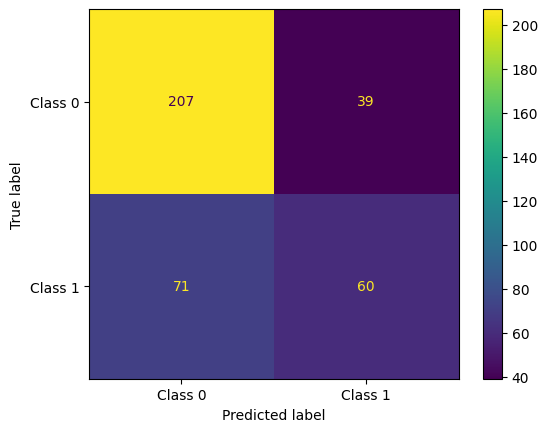

In [37]:
#Fit the Logistic Regression for Binary Calssification of LSD (LSD_Binary) and plot confusion matrix
fit_logisticReg_model(df_bin, X, 'LSD_Binary')

#### Comments :
#### In the above model for binary classification of LSD
#### Out of total 246 class 0 in the test set model predicted 207 class 0 correctly
#### Out of 131 class 1 in the test set model predicted 60 class 1 correctly

#### So model predicted 84.15 % of Class 0 items correctly
#### where as it predicted 45.80 % of Class 1 items correctly
#### So accuracy of prediction of Class 0 is better then Class 1 for this model (for LSD drug)

### 2. one class (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).

### Choosing Meth as the 2nd drug for the binary classification

In [38]:
#Taking Meth as the second of the feature for Binary Classification
#Creating new column Meth_Binary from existing Meth column containing class 0 and 1 where
#class 0 for the variable "Never Used"(CL0),"Used in Last Decade"(CL2) and  "Used in Last Year" (CL3)
#the remaining variables to the other class 1
df_bin.loc[(df_bin['Meth'] == 'CL0') | (df_bin['Meth'] == 'CL2') | (df_bin['Meth'] == 'CL3'), 'Meth_Binary'] = 0
df_bin.loc[(df_bin['Meth'] != 'CL0') & (df_bin['Meth'] != 'CL2') & (df_bin['Meth'] != 'CL3'), 'Meth_Binary'] = 1
df_bin['Meth_Binary'] = df_bin['Meth_Binary'].astype('int64')
df_bin['Meth_Binary'].value_counts()

0    1675
1     210
Name: Meth_Binary, dtype: int64

Accuracy of Logistic Regression with default parmeters for Meth binary classification on Train set is : 0.8893
Accuracy of Logistic Regression with default parmeters for Meth binary classification on Test set is : 0.8886

 y_test value counts for each class : 0    335
1     42
Name: Meth_Binary, dtype: int64


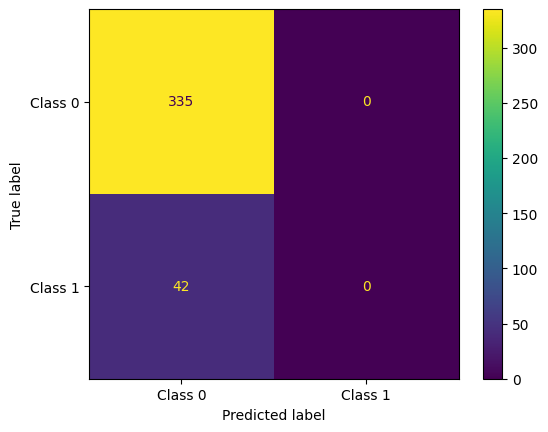

In [39]:
#Fit the Logistic Regression for Binary Calssification of 2nd drug Meth (Meth_Binary) and plot confusion matrix
fit_logisticReg_model(df_bin, X, 'Meth_Binary')

#### Comments :
#### In the above model for binary classification of Meth Model predicted all items to belomng to Class 0
#### Out of total 335 class 0 in the test set model predicted 335 class0 classes correctly
#### Out of 42 class1 in the test set model predicted 0 class1 classes correctly

#### So model predicted 100 % of Class 0 items correctly
#### where as it predicted 0 % of Class 1 items correctly
#### So accuracy of Class 0 is better then Class 1 for this model for Meth drug
#### This is really imbalanced dataset with aprroximately 80 % value beloninging to class 0
#### Although the test accuracy is 88.86 % but model is predicting all items to beloing to Class 0 so not a good model

### 3. one class (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).

#### Choosing Nicotine as the 3rd drug for the binary classification

In [40]:
#Taking Nicotine as the third of the drug for Binary Classification
#Creating new column Nicotine_Binary from existing Heroin column containing class 0 and 1 where
#class 0 for the variable "Never Used"(CL0),"Used in Last Decade"(CL2) ,"Used in Last Year" (CL3) and "Used in Last Month" (CL4)
#the remaining variables to the other class 1
df_bin.loc[(df_bin['Nicotine'] == 'CL0') | (df_bin['Nicotine'] == 'CL2') | (df_bin['Nicotine'] == 'CL3')
            | (df_bin['Nicotine'] == 'CL4'), 'Nicotine_Binary'] = 0

df_bin.loc[(df_bin['Nicotine'] != 'CL0') & (df_bin['Nicotine'] != 'CL2') & (df_bin['Nicotine'] != 'CL3')
            & (df_bin['Nicotine'] != 'CL4'), 'Nicotine_Binary'] = 1
df_bin['Nicotine_Binary'] = df_bin['Nicotine_Binary'].astype('int64')
df_bin['Nicotine_Binary'].value_counts()

1    960
0    925
Name: Nicotine_Binary, dtype: int64

Accuracy of Logistic Regression with default parmeters for Nicotine binary classification on Train set is : 0.6253
Accuracy of Logistic Regression with default parmeters for Nicotine binary classification on Test set is : 0.5889

 y_test value counts for each class : 1    190
0    187
Name: Nicotine_Binary, dtype: int64


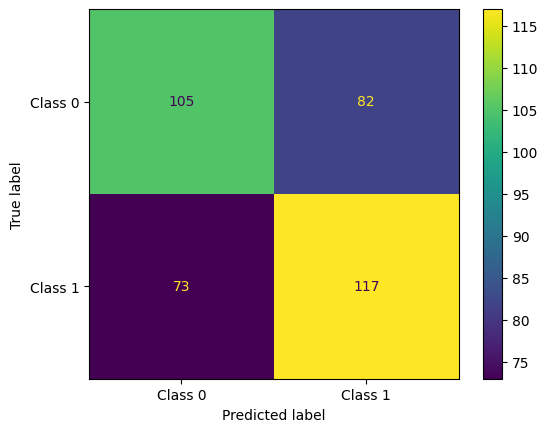

In [41]:
#Fit the Logistic Regression for Binary Calssification of 3rd drug Nicotine (Nicotine_Binary) and plot confusion matrix
fit_logisticReg_model(df_bin, X, 'Nicotine_Binary')

#### Comments
#### In the above model for binary classification of Nicotine
#### Out of total 187 class 0 in the test set model predicted 105 class0 classes correctly
#### Out of 190 class1 in the test set model predicted 117 class1 classes correctly

#### So model predicted 56.15 % of Class 0 items correctly
#### where as it predicted 61.58 % of Class 1 items correctly
#### So accuracy of prediction of Class 1 is better then Class 0 for this model for Nicotine drug